In [28]:
import numpy as np
import pandas as pd 
import cv2
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from keras.preprocessing.image import img_to_array
import keras as keras

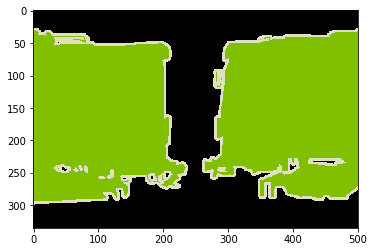

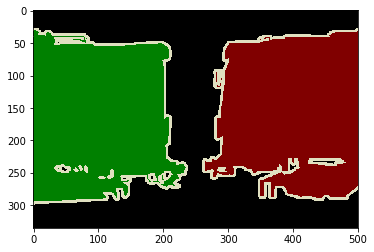

(335, 500, 3)


In [29]:
image = mpimg.imread(r"C:\Users\Ishan\Desktop\apps_data\VOC2012\SegmentationClass\2007_000042.png")
plt.imshow(image)
plt.show()
image = mpimg.imread(r"C:\Users\Ishan\Desktop\apps_data\VOC2012\SegmentationObject\2007_000042.png")
plt.imshow(image)
plt.show()
print(image.shape)

In [30]:
from scipy import misc

In [31]:
def load_data(original_img_path, original_mask_path):
    original_img = cv2.imread(original_img_path)[:, :, ::-1]
    original_img=misc.imresize(original_img, (330,500,3))
    original_mask = cv2.imread(original_mask_path)
    print(original_img.shape)
    

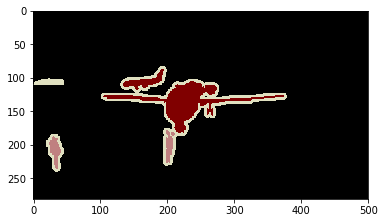

C:\Users\Ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(330, 500, 3)


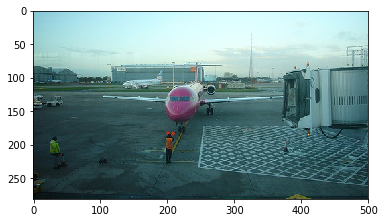

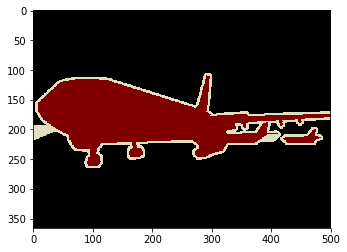

(330, 500, 3)


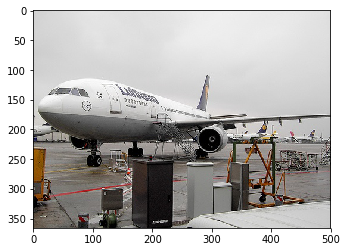

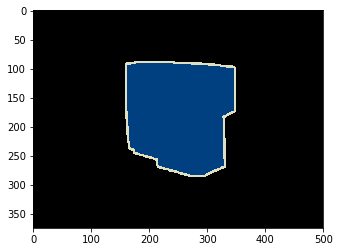

(330, 500, 3)


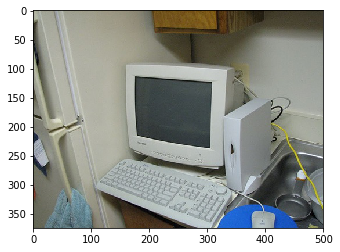

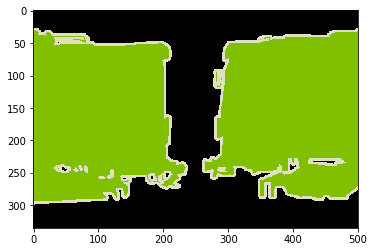

(330, 500, 3)


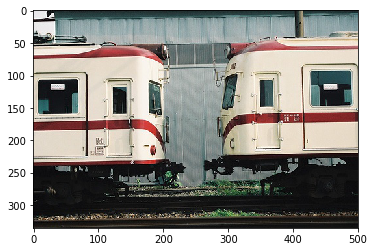

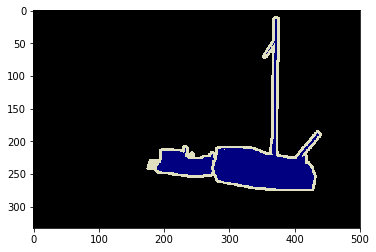

(330, 500, 3)


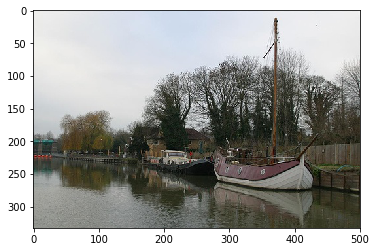

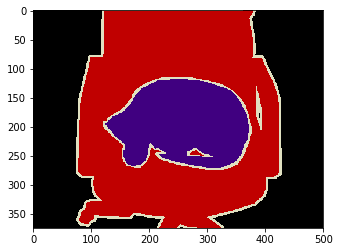

(330, 500, 3)


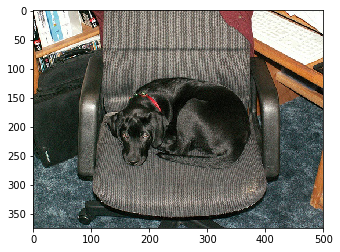

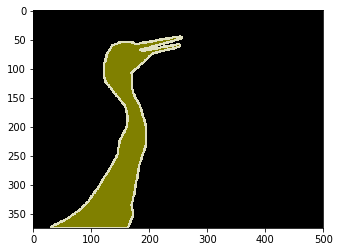

(330, 500, 3)


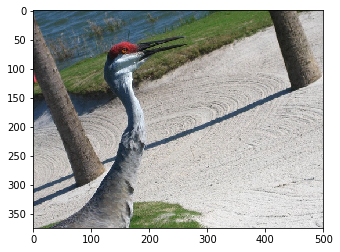

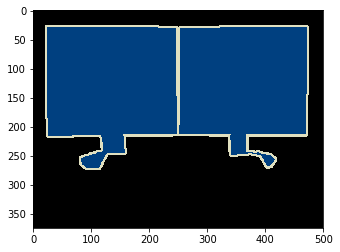

(330, 500, 3)


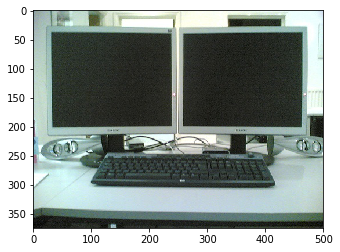

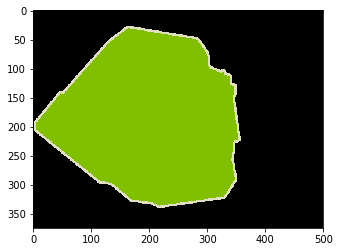

(330, 500, 3)


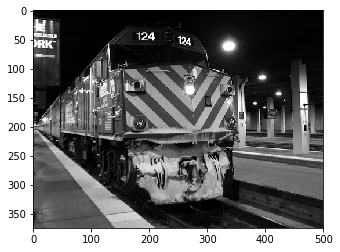

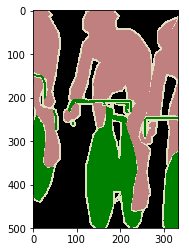

(330, 500, 3)


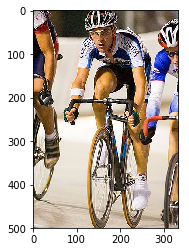

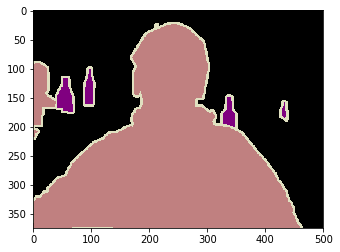

(330, 500, 3)


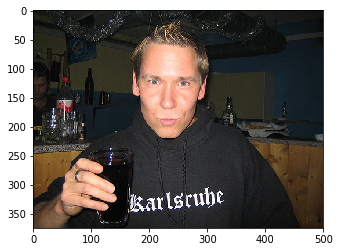

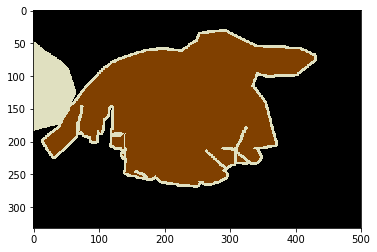

(330, 500, 3)


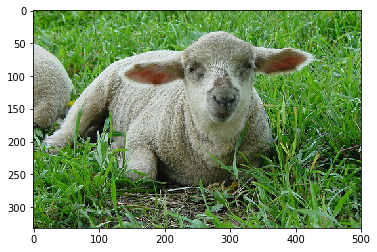

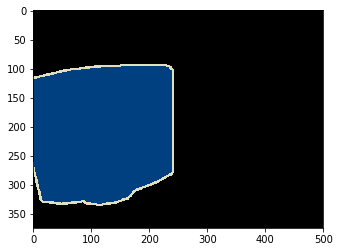

(330, 500, 3)


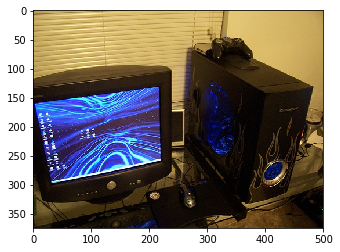

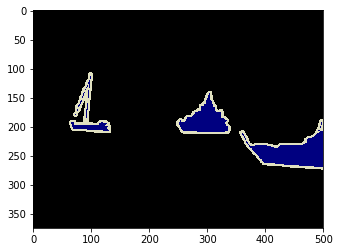

(330, 500, 3)


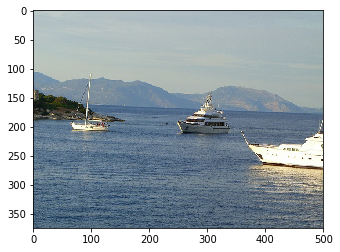

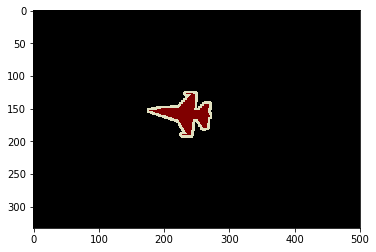

(330, 500, 3)


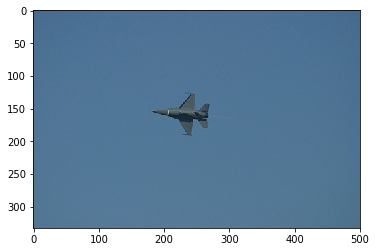

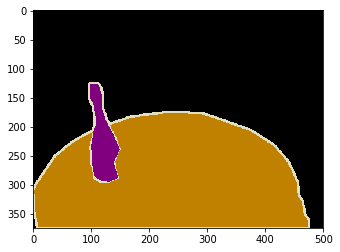

(330, 500, 3)


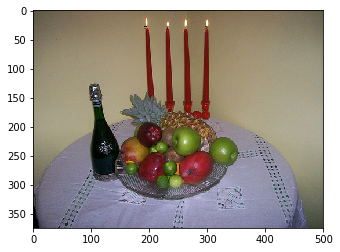

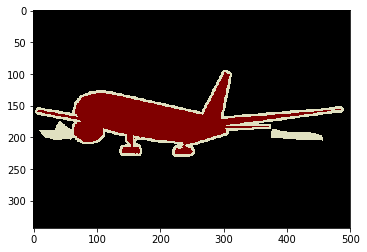

(330, 500, 3)


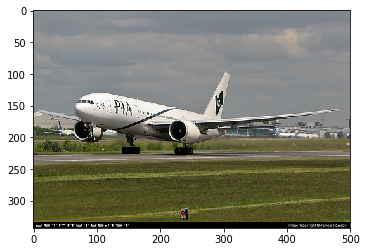

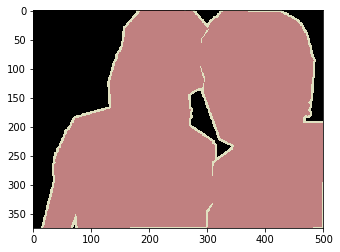

(330, 500, 3)


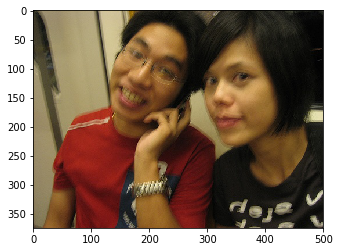

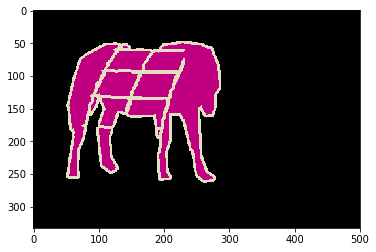

(330, 500, 3)


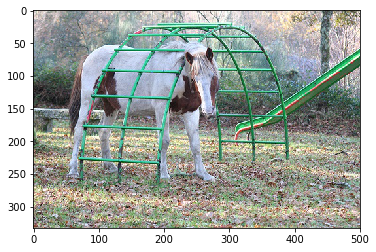

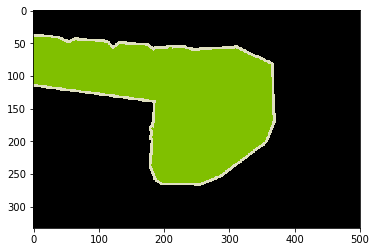

(330, 500, 3)


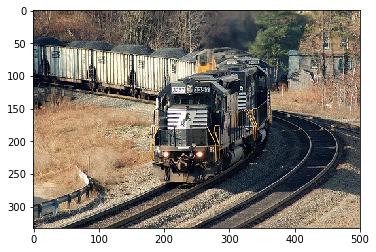

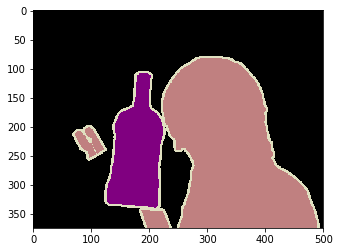

(330, 500, 3)


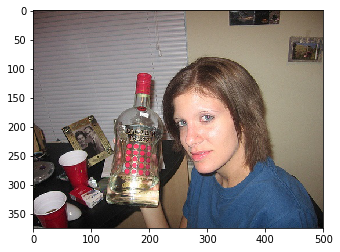

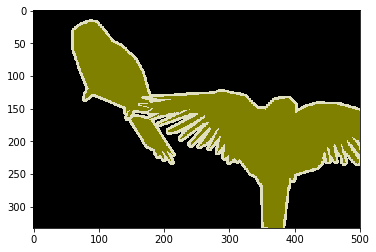

(330, 500, 3)


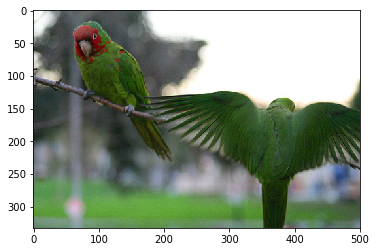

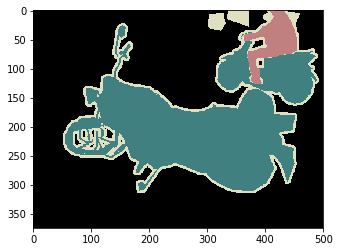

(330, 500, 3)


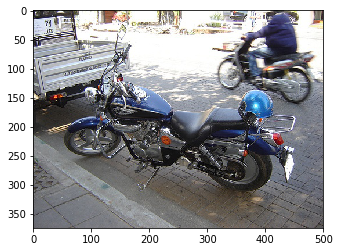

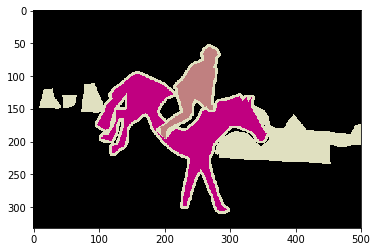

(330, 500, 3)


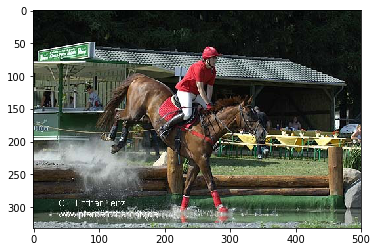

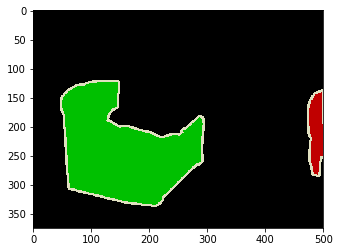

(330, 500, 3)


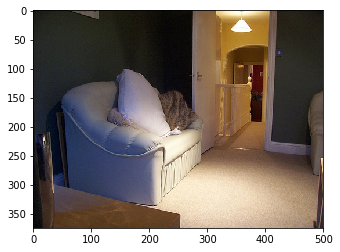

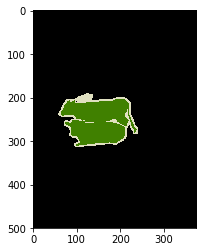

(330, 500, 3)


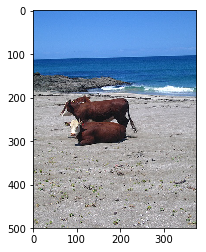

In [32]:
Dataset=os.listdir(r"C:\Users\Ishan\Desktop\apps_data\VOC2012\SegmentationClass")
count=0
datafile=[]
for i in  Dataset:
    if count>25:
        break;
    nstr=r"C:\Users\Ishan\Desktop\apps_data\VOC2012\JPEGImages/" + i.split('.',1)[0]+".jpg"
    exists = os.path.isfile(nstr)
    if exists:
        pstr=r"C:\Users\Ishan\Desktop\apps_data\VOC2012\SegmentationClass/"+i
        
        image = mpimg.imread(pstr)
        
        plt.imshow(image)
        plt.show()
        load_data(nstr,pstr)
        image = mpimg.imread(nstr)
        plt.imshow(image)
        plt.show()
        datafile.append(i)
        count=count+1
    else:
        print("not found {}".format(nstr))

In [57]:
def create_encoding_layers():
    kernel = 3
    filter_size = 64
    pad = 1
    pool_size = 2
    return [
        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(filter_size, kernel, kernel, border_mode='valid'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size)),

        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(128, kernel, kernel, border_mode='valid'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size)),

        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(256, kernel, kernel, border_mode='valid'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size)),

        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(512, kernel, kernel, border_mode='valid'),
        BatchNormalization(),
        Activation('relu'),
    ]

def create_decoding_layers():
    kernel = 3
    filter_size = 64
    pad = 1
    pool_size = 2
    return[
        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(512, kernel, kernel, border_mode='valid'),
        BatchNormalization(),

        UpSampling2D(size=(pool_size,pool_size)),
        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(256, kernel, kernel, border_mode='valid'),
        BatchNormalization(),

        UpSampling2D(size=(pool_size,pool_size)),
        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(128, kernel, kernel, border_mode='valid'),
        BatchNormalization(),

        UpSampling2D(size=(pool_size,pool_size)),
        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(filter_size, kernel, kernel, border_mode='valid'),
        BatchNormalization(),
    ]  

In [61]:
segnet_basic = keras.Sequential()
#330, 500, 3
# segnet_basic.add(keras.layers(input_shape = (3, 330, 500)))

# segnet_basic.encoding_layers = create_encoding_layers()
# for l in segnet_basic.encoding_layers:
#     segnet_basic.add(l)

# Note: it this looks weird, that is because of adding Each Layer using that for loop
# instead of re-writting mode.add(somelayer+params) everytime.

# segnet_basic.decoding_layers = create_decoding_layers()
# for l in segnet_basic.decoding_layers:
#     segnet_basic.add(l)

# segnet_basic.add(Convolution2D(12, 1, 1, border_mode='valid',))

# segnet_basic.add(Reshape((12,data_shape), input_shape=(12,330, 500)))
# segnet_basic.add(Permute((2, 1)))
# segnet_basic.add(Activation('softmax'))